https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ - индус

http://habrahabr.net/habr/324924/ - лошадь

In [1]:
from sklearn import linear_model

In [2]:
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [3]:
reg.coef_

array([0.34545455, 0.34545455])

In [4]:
reg.intercept_

0.1363636363636364

Ч. 2

In [5]:
import numpy as np
import pandas as pd

In [6]:
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [7]:
train = pd.read_csv("./../cleaning/train_clean.csv", encoding= "utf_8")
test = pd.read_csv("./../cleaning/test_clean.csv", encoding= "utf_8")
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [8]:
from sklearn.linear_model import ElasticNet

In [9]:
lreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

In [10]:
from sklearn.preprocessing import Imputer

In [11]:
imp = Imputer()

splitting into training and cv for cross validation

In [12]:
COLS = ['full_sq','floor','life_sq' ,'num_room' ,'build_year', 'market_count_5000']

In [13]:
X = train.loc[:,COLS]

In [14]:
X = imp.fit_transform(X)

In [15]:
x_train, x_cv, y_train, y_cv = train_test_split(X, train.price_doc, test_size =0.3)

In [16]:
lreg.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
x_cv[0]

array([1.60000000e+02, 2.40000000e+01, 1.60000000e+02, 1.90818086e+00,
       3.24158679e+03, 6.00000000e+00])

predicting on cv

In [18]:
pred = lreg.predict(x_cv)

calculating mse

In [19]:
mse = np.sqrt(np.mean((pred - y_cv)**2))

In [20]:
mse

198808272.86788985

In [21]:
coeff = DataFrame(COLS)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff.head()

,0,Coefficient Estimate
0,full_sq,135439.770586
1,floor,60026.878164
2,life_sq,4956.276159
3,num_room,57921.104700
4,build_year,-947.765392


In [22]:
lreg.score(x_cv,y_cv)

-1702.2364297433533

In [23]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [24]:
pred_cv = lreg.predict(x_cv)

Text(0.5,1,u'Residual plot')

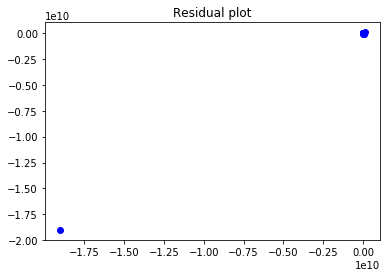

In [25]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

In [26]:
mse = np.sqrt(np.mean((pred_cv - y_cv)**2))
mse

198808272.86788985

In [27]:
lreg.score(x_cv,y_cv)

-1702.2364297433533

checking the magnitude of coefficients

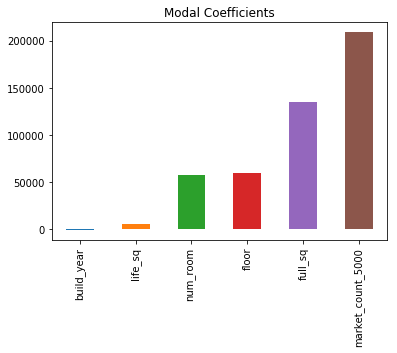

In [28]:
coef = Series(lreg.coef_,COLS).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder

In [71]:
cols = ['max_floor', 'material', 'build_year', 'ID_metro', 'sub_area']
data = train.loc[:,cols]

In [77]:
lreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
imp = Imputer(strategy='median')
print data.head()

   max_floor  material  build_year  ID_metro  sub_area_Ajeroport  \
0        NaN       NaN         NaN         1                   0   
1        NaN       NaN         NaN         2                   0   
2        NaN       NaN         NaN         3                   0   
3        NaN       NaN         NaN         4                   0   
4        NaN       NaN         NaN         5                   0   

   sub_area_Akademicheskoe  sub_area_Alekseevskoe  sub_area_Altuf'evskoe  \
0                        0                      0                      0   
1                        0                      0                      0   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      0   

   sub_area_Arbat  sub_area_Babushkinskoe        ...         sub_area_Vnukovo  \
0               0                       0        ... 

In [78]:
# sub_area = LabelEncoder().fit_transform(train.loc[:,[cols]])
# sub_area
data = pd.get_dummies(data, columns = ['sub_area'])
data.head()

ValueError: labels ['sub_area'] not contained in axis

In [79]:
imputed_data = pd.DataFrame(imp.fit_transform(data))
imputed_data.columns = data.columns
print imputed_data.head()

   max_floor  material  build_year  ID_metro  sub_area_Ajeroport  \
0       14.0       1.0      1981.0       1.0                 0.0   
1       14.0       1.0      1981.0       2.0                 0.0   
2       14.0       1.0      1981.0       3.0                 0.0   
3       14.0       1.0      1981.0       4.0                 0.0   
4       14.0       1.0      1981.0       5.0                 0.0   

   sub_area_Akademicheskoe  sub_area_Alekseevskoe  sub_area_Altuf'evskoe  \
0                      0.0                    0.0                    0.0   
1                      0.0                    0.0                    0.0   
2                      0.0                    0.0                    0.0   
3                      0.0                    0.0                    0.0   
4                      0.0                    0.0                    0.0   

   sub_area_Arbat  sub_area_Babushkinskoe        ...         sub_area_Vnukovo  \
0             0.0                     0.0        ... 

In [106]:
def buildModel(data):
    x_train, x_cv, y_train, y_cv = train_test_split(data.values, train.price_doc, test_size =0.3)
    lreg.fit(x_train,y_train)
    print 'cv'
    print x_cv
    pred = lreg.predict(x_cv)
    mse = np.sqrt(np.mean((pred - y_cv)**2))
    print 'mse'
    print mse
    print 'score'
    print lreg.score(x_cv,y_cv)
    return

In [108]:
buildModel(imputed_data)

cv
[[1.700e+01 1.000e+00 1.981e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.200e+01 1.000e+00 2.000e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.400e+01 1.000e+00 1.981e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.500e+01 1.000e+00 2.011e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [5.000e+00 2.000e+00 1.960e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.700e+01 1.000e+00 2.006e+03 ... 0.000e+00 0.000e+00 0.000e+00]]
mse
4543533.697475743
score
0.031629136440033845
